# Work done with [Gabriel Truong](https://github.com/GabrielTruong)

In [209]:
import os
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment bellow if needed
# !pip install wget
import wget

# Nice paccakge allowing to visualize patterns of missing data
# https://github.com/ResidentMario/missingno
# !pip install missingno
import missingno as msno

# Exercise: Air quality EPF

As seen in class, neglecting data cleaning may lead to biased and even completely wrong analysis. In this activity, you will be working with a dataset collected at EPF by a device assembled during a student project. Their device includes a number of sensors collecting infrmation on air quality at the campus. You can visualize the data collected at this page:

[Station qualité de l'air EPF](http://station-qualite.000webhostapp.com/visualisation.html)


A student inexperienced in data analysis wanted to do a correlation analysis between the different elements. He downloaded the csv file and directly computed correlations between all time series.


In [210]:
data_fname = 'donnee_Station_Meteo.csv'
if not os.path.exists(data_fname):
    wget.download('http://station-qualite.000webhostapp.com/export.php?', data_fname)

In [211]:
data = pd.read_csv(data_fname, sep=';')
data.head()

,id,time,Temp1,hum1,Pression,Temp2,hum2,Conc_Stand_1,Conc_Stand_25,Conc_Stand_10,...,Conc_Env_25,Conc_Env_10,Part_03,Part_05,Part_1,Part_25,Part_5,Part_50,Lum,
0,1,2018-06-22 12:00:52,28.70,41.45,1011.88,29.07,50.52,6,10,22,...,10,22,0,0,0,0,0,0,51,
1,2,2018-06-22 12:05:59,26.67,44.21,1011.90,26.63,53.92,6,9,9,...,9,9,1164,366,50,3,0,0,54,
2,3,2018-06-22 12:11:05,25.63,46.44,1011.81,26.34,54.95,6,8,10,...,8,10,1164,340,37,5,2,0,22,
3,4,2018-06-22 12:16:12,24.88,50.00,1011.77,26.07,57.26,7,8,9,...,8,9,1245,367,45,3,1,0,9,
4,5,2018-06-22 12:21:19,24.95,49.12,1011.67,26.01,56.83,4,6,6,...,6,6,1182,332,28,2,0,0,11,


<AxesSubplot:>

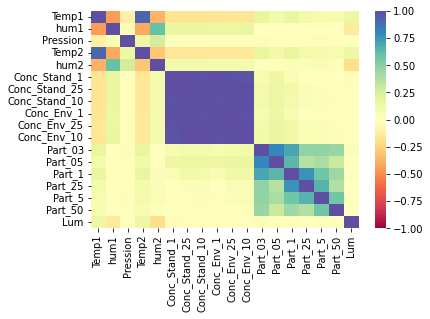

In [212]:
# Correlation matrix
corr = data.drop(columns=['id']).corr()
sns.heatmap(corr, cmap='Spectral', center=0, vmax=1., vmin=-1.)


In [213]:
corr

,Temp1,hum1,Pression,Temp2,hum2,Conc_Stand_1,Conc_Stand_25,Conc_Stand_10,Conc_Env_1,Conc_Env_25,Conc_Env_10,Part_03,Part_05,Part_1,Part_25,Part_5,Part_50,Lum
Temp1,1.000000,-0.449479,-0.094388,0.914948,-0.377897,-0.167336,-0.164402,-0.165761,-0.159330,-0.155279,-0.157007,0.174020,0.098967,0.167288,0.093972,0.084509,0.074256,0.140332
hum1,-0.449479,1.000000,0.051350,-0.414035,0.595250,0.156306,0.156400,0.163294,0.156046,0.154052,0.161665,0.003203,0.014425,0.018538,0.012306,0.010412,0.021910,-0.139824
Pression,-0.094388,0.051350,1.000000,0.133911,0.263297,0.028742,0.026628,0.026882,0.029702,0.026857,0.027206,0.032111,0.024982,0.027662,0.024681,0.031386,0.026522,0.007877
Temp2,0.914948,-0.414035,0.133911,1.000000,-0.298456,-0.154473,-0.151898,-0.153248,-0.146434,-0.142911,-0.144599,0.176424,0.102866,0.172620,0.099247,0.089496,0.073472,0.133789
hum2,-0.377897,0.595250,0.263297,-0.298456,1.000000,0.097865,0.089021,0.090549,0.098506,0.086498,0.087951,0.016754,0.025928,0.044782,0.043757,0.062078,0.025680,-0.199796
Conc_Stand_1,-0.167336,0.156306,0.028742,-0.154473,0.097865,1.000000,0.994273,0.988065,0.999663,0.991037,0.982680,0.071482,0.134215,0.057578,0.004904,0.012728,0.001625,-0.016650
Conc_Stand_25,-0.164402,0.156400,0.026628,-0.151898,0.089021,0.994273,1.000000,0.995644,0.994731,0.999009,0.993389,0.093042,0.152726,0.101567,0.042800,0.030322,0.014086,-0.014179
Conc_Stand_10,-0.165761,0.163294,0.026882,-0.153248,0.090549,0.988065,0.995644,1.000000,0.988655,0.995015,0.998317,0.091254,0.149075,0.100723,0.044859,0.036195,0.017259,-0.014756
Conc_Env_1,-0.159330,0.156046,0.029702,-0.146434,0.098506,0.999663,0.994731,0.988655,1.000000,0.992469,0.984448,0.078675,0.139086,0.065665,0.011293,0.021227,0.008607,-0.015126
Conc_Env_25,-0.155279,0.154052,0.026857,-0.142911,0.086498,0.991037,0.999009,0.995015,0.992469,1.000000,0.995167,0.100971,0.157840,0.111094,0.051687,0.041202,0.022793,-0.011634


Our inexperienced student thinks all is fine and takes these results as solid evidence-based truth. 

However, some of these correlations (or lack thereof) are rather surprising. In particular, pay attention to the atmospheric pression. According to this analysis, it does not present  correlations with any other variables, including temperature and humidity (`Temp2` and `hum2` are the only ones displaying a weak correlation). 

In [214]:
corr.Pression

Temp1           -0.094388
hum1             0.051350
Pression         1.000000
Temp2            0.133911
hum2             0.263297
Conc_Stand_1     0.028742
Conc_Stand_25    0.026628
Conc_Stand_10    0.026882
Conc_Env_1       0.029702
Conc_Env_25      0.026857
Conc_Env_10      0.027206
Part_03          0.032111
Part_05          0.024982
Part_1           0.027662
Part_25          0.024681
Part_5           0.031386
Part_50          0.026522
Lum              0.007877
Name: Pression, dtype: float64


Let's take a look at the pression time series:

In [215]:
data['time'] = pd.to_datetime(data.time)
px.line(data, x='time', y='Pression')

You can see there are clear outliers, possibly caused by some sensor malfunction. If you continue to explore the data, you will encounter similar problems with the timeseries from other sensors.

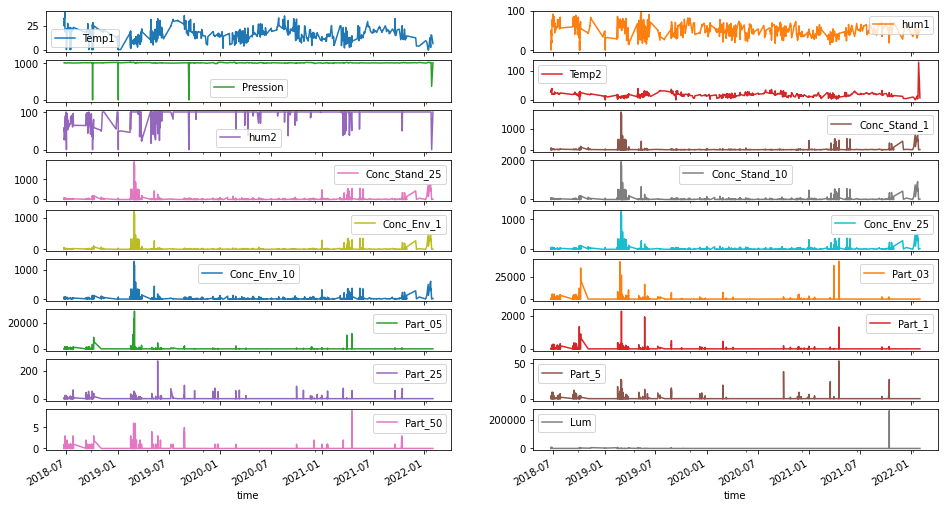

In [216]:
data.drop(columns=['id']).plot(x='time', subplots=True, figsize=(16,10), layout=(10, 2));


## Objective
This activity is an evaluation element of the skill 
> Evaluate the statistical bias to present the cost/benefit tradeoff of Data Cleaning

Your general goal is to present the importance of the cleaning process to the validity of a data analysis. 


## Instructions
You should produce a report in the form of a Jupyter notebook. A good report must include explanations backing up the analysis and argument for the importance of the cleaning procedure in producing a proper correlation analysis. 

Initially, you will focus on the variable `Pression`. Show that it's lack of correlation with the temperature and humidity sensors is wrongly deduced because of the presence of outliers. 

1. Pick a simple but suitable method to remove these outliers (try winsorizing or cliping and replacing with na).
1. Try different methods of filling the NA values left by outlier removal (backfill, interpolate, etc.)
1. Collect all different versions fo the `Pression` series in a new dataframe to facilitate some comparisons:
    1. Plot each pressure timeseries and compare the lines.
    1. Compare descriptive statistics of the pression series before and after each cleaning step.
    1. Compare histograms of the different versions of the `Pression` series
    1. Compare correlations using the original series and using the different versions of the clean series.

You may then pursue your analysis by cleaning other variables in order to obtain a more meaningful correlation analysis. To limit the duration of this activity, you may restrain your analysis to the variables involving pressure, temperature and humidity. 


## Suggested plots
Assuming the different versions of the `Pression` series were collected in a new dataframe `pression`. To this dataframe, the `time` variable was also added (copied from the original dataframe).

In [217]:
pression = pd.DataFrame({
    'time': data.time,
    'original': data.Pression,
    'method1': np.random.randn(data.Pression.shape[0]),
    'method2': np.random.randn(data.Pression.shape[0]),
    'method3': np.random.randn(data.Pression.shape[0]),
    'method4': np.random.randn(data.Pression.shape[0]),
    })
pression.head()

,time,original,method1,method2,method3,method4
0,2018-06-22 12:00:52,1011.88,-2.364213,-1.098270,0.249271,1.547963
1,2018-06-22 12:05:59,1011.90,-0.564442,-0.033708,0.750132,1.294140
2,2018-06-22 12:11:05,1011.81,1.620094,0.353403,1.533544,0.564185
3,2018-06-22 12:16:12,1011.77,2.397345,0.603983,-1.453456,0.550501
4,2018-06-22 12:21:19,1011.67,-0.961955,-0.691709,-0.314710,-0.492520


## Pression
### Using clipping 
All the values that are above the upper limit are replaced by the upper limite, all the values that are under the lower limit take the lower limit value.


[Source for Clipping method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.clip.html)

### Using winsorizing

With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. For example, if k=5, all observations above the 95th percentile are recoded to the value of the 95th percentile, and values below the 5th percent are recoded, respectively.

[Source for Winsorizing method](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0)

*In our case, we used cliping to remove the outliers.*

**After checking the pression in Montpellier from 2018 and 2022, the range of pressure is between 985 and 1038. We will clean the data according to this information.**



/home/mraillat/.local/lib/python3.8/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



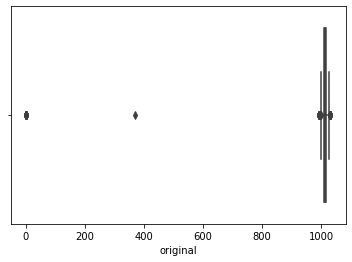

In [218]:
ax = sns.boxplot(x=pression["original"],orient='vert')

In [219]:
pression['original'].describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

count    3036.000000
mean     1006.951647
std        83.064496
min         0.000000
1%        993.230000
10%      1006.910000
20%      1009.090000
30%      1010.780000
40%      1011.910000
50%      1013.135000
60%      1014.890000
70%      1016.320000
80%      1018.750000
90%      1021.740000
99%      1027.956500
max      1030.880000
Name: original, dtype: float64

In [220]:
def remove_outliers(df,col_name):
    for name in col_name:
        df[name] = df["original"]
        df[name] = df[name].clip(lower=900,upper=1050)
        df[name].replace(900,np.nan,inplace=True)



In [221]:
method_list= ["method1","method2","method3","method4"]
remove_outliers(pression,method_list)

## Method 1 : Fill na with the average
Using the method fillna and the value is equal to the mean of the sample 

In [222]:
sample_method1_mean = pression["method1"].mean()
pression["method1"]= pression["method1"].fillna(value=sample_method1_mean)

## Method 2 : Fill na with the previous value 
"backfill" replace Na by the previous value in our dataframe 

In [223]:
pression["method2"]= pression["method2"].fillna(method="backfill")

## Method 3 : Fill na with interpolation


In [224]:
pression["method3"]= pression["method3"].interpolate(method="linear",axis=0,limit=None)

## Method 4 : FillNa with KNN imputation

Using KNN imputer to fill the NaN values.
[Source to implement this imputation](https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/)

From the results shown below, we can see that it not very interesting to use KNN Imputation in our case. It will result in the same result as we had with linear interpolation. That is because we treat missing values or outliers as univariate data point.


In [225]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights='uniform', metric='nan_euclidean')

In [226]:
X = pression["method4"].values.reshape(-1,1)
X_transformed = imputer.fit_transform(X)
pression['method4']=X_transformed



In [227]:
pression.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,original,method1,method2,method3,method4
count,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000
mean,1006.951647,1013.842693,1013.901054,1013.862045,1013.842693
std,83.064496,6.076048,6.118138,6.088996,6.076048
min,0.000000,993.030000,993.030000,993.030000,993.030000
1%,993.230000,996.927500,996.927500,996.927500,996.927500
10%,1006.910000,1006.970000,1006.970000,1006.970000,1006.970000
20%,1009.090000,1009.330000,1009.330000,1009.330000,1009.330000
30%,1010.780000,1010.825000,1010.825000,1010.820000,1010.825000
40%,1011.910000,1012.000000,1012.000000,1011.980000,1012.000000
50%,1013.135000,1013.200000,1013.200000,1013.180000,1013.200000


# Result for treating pression missing values
First we used the clipping method to replace outliers to Na values. Then we handle the NA values in 4 different methods. We can see from the "describe" table below that the percentile of each method is very close to each other if not equal. We can observe a slight difference on the mean and std value.

To compare the original and the different methods, three majors changes occured: 
- The minimum value is not 0 anymore
- The mean value is higher after the changes
- The standard deviation is far less important 
  
=> From the histogram, we see that the distribution is now much better.

From 2018 and 2022, the range of pressure is between 985 and 1038. The range seems small so it makes sense with the value of the mean and std that we found after modification!




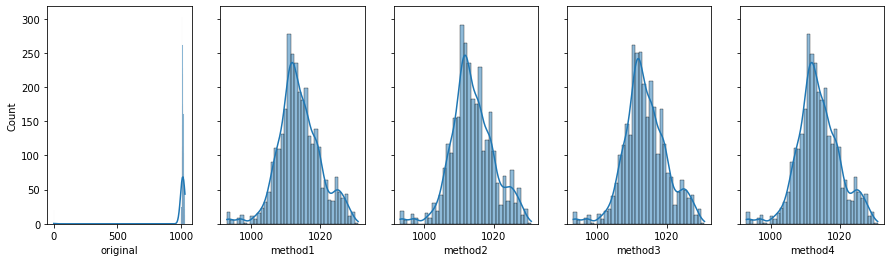

In [228]:
# Histograms
fig, axs = plt.subplots(1, pression.shape[1]-1, figsize=(15,4), sharey=True)
for i, col in enumerate(pression.drop('time',axis=1)):
        sns.histplot(pression, x=col, ax=axs[i], kde=True)


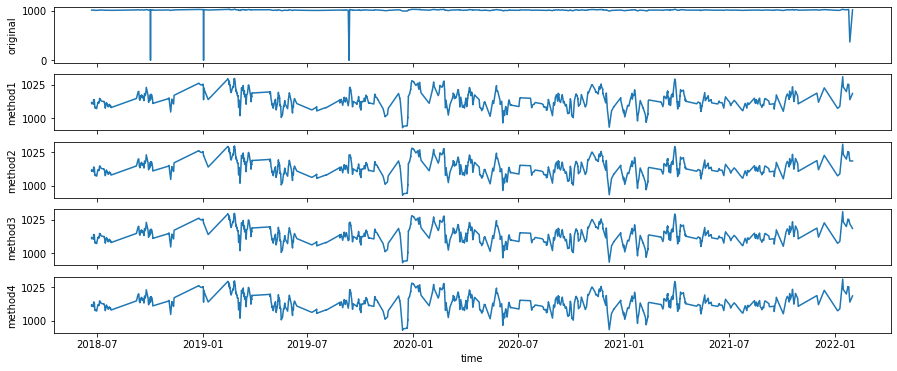

In [229]:
# Time series
fig, axs = plt.subplots(pression.shape[1]-1, 1, figsize=(15,6), sharex=True)
for i, col in enumerate(pression.drop('time',axis=1)):
        sns.lineplot(data=pression, x='time', y=col, ax=axs[i])


For this case , all the method give us a good result so we can chose one of them

# Temperature
**From 2018 and 2022, the range of temperature is between -7°C and 43,5°C. We will make the asumption that the data collected were outdours. We will treat the data according to these asumptions.**

In [230]:
temperature = pd.DataFrame({
    'time': data.time,
    'original_temp': data.Temp2,
    'method1_temp': np.random.randn(data.Pression.shape[0]),
    'method2_temp': np.random.randn(data.Pression.shape[0]),
    'method3_temp': np.random.randn(data.Pression.shape[0]),
    'method4_temp': np.random.randn(data.Pression.shape[0]),
    })
temperature.tail()


,time,original_temp,method1_temp,method2_temp,method3_temp,method4_temp
3031,2022-01-23 15:23:36,12.63,-1.461872,0.215372,-0.999082,0.886477
3032,2022-01-23 15:24:06,12.60,-0.987477,1.209841,-0.907691,-0.853801
3033,2022-01-24 14:45:46,15.50,-0.071567,-0.624369,-0.292984,-1.606518
3034,2022-01-26 15:42:28,129.37,-0.272255,1.072437,1.278034,1.315551
3035,2022-01-31 07:08:40,6.97,0.966672,-0.353344,0.898395,0.505437


In [231]:
temperature.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,original_temp,method1_temp,method2_temp,method3_temp,method4_temp
count,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000
mean,19.160418,-0.016504,-0.039155,-0.007038,0.010797
std,8.106661,0.983708,1.008340,1.015843,0.983829
min,0.000000,-3.059862,-3.758148,-3.342215,-3.476473
1%,2.907000,-2.379680,-2.401986,-2.353650,-2.309940
10%,9.810000,-1.274037,-1.328459,-1.328747,-1.259773
20%,12.570000,-0.843342,-0.863264,-0.908269,-0.791694
30%,14.025000,-0.521920,-0.541960,-0.536811,-0.496575
40%,16.330000,-0.264490,-0.289304,-0.246637,-0.218726
50%,18.270000,-0.027125,-0.029965,0.033678,0.019084


In [232]:
def remove_outliers(df,col_name):
    for name in col_name:
        df[name] = df["original_temp"]
        df[name] = df[name].clip(lower=-10,upper=45) #Range from what we found
        df[name].replace(-10,np.nan,inplace=True)
        df[name].replace(45,np.nan,inplace=True)

method_list= ["method1_temp","method2_temp","method3_temp","method4_temp"]
remove_outliers(temperature,method_list)

In [233]:
temperature.sort_values(by="method1_temp").tail()

,time,original_temp,method1_temp,method2_temp,method3_temp,method4_temp
75,2018-06-25 13:04:51,38.01,38.01,38.01,38.01,38.01
78,2018-06-25 13:20:13,38.57,38.57,38.57,38.57,38.57
861,2019-04-29 10:33:34,38.97,38.97,38.97,38.97,38.97
74,2018-06-25 12:59:44,39.39,39.39,39.39,39.39,39.39
3034,2022-01-26 15:42:28,129.37,NaN,NaN,NaN,NaN


In [234]:
sample_method1_mean_temp = temperature["method1_temp"].mean()
temperature["method1_temp"]= temperature["method1_temp"].fillna(value=sample_method1_mean_temp)

In [235]:
temperature["method2_temp"]= temperature["method2_temp"].fillna(method="backfill")

In [236]:
temperature["method3_temp"]= temperature["method3_temp"].interpolate(method="linear",axis=0,limit=None)

In [237]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights='uniform', metric='nan_euclidean')
X = temperature["method4_temp"].values.reshape(-1,1)
X_transformed = imputer.fit_transform(X)
temperature['method4_temp']=X_transformed

In [238]:
temperature.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,original_temp,method1_temp,method2_temp,method3_temp,method4_temp
count,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000
mean,19.160418,19.124105,19.120102,19.121507,19.124105
std,8.106661,7.855864,7.858960,7.857169,7.855864
min,0.000000,0.000000,0.000000,0.000000,0.000000
1%,2.907000,2.907000,2.907000,2.907000,2.907000
10%,9.810000,9.810000,9.805000,9.810000,9.810000
20%,12.570000,12.570000,12.570000,12.570000,12.570000
30%,14.025000,14.025000,14.015000,14.015000,14.025000
40%,16.330000,16.330000,16.330000,16.330000,16.330000
50%,18.270000,18.270000,18.265000,18.265000,18.270000


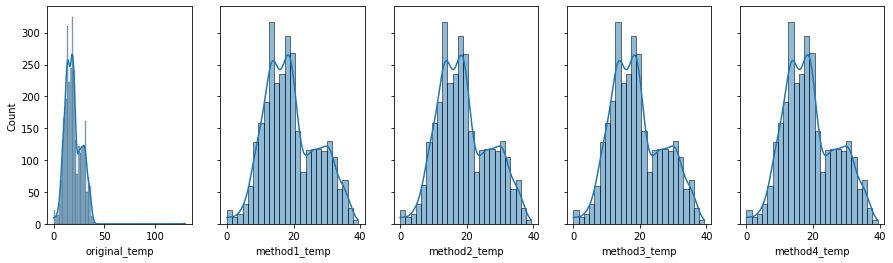

In [239]:
# Histograms
fig, axs = plt.subplots(1, temperature.shape[1]-1, figsize=(15,4), sharey=True)
for i, col in enumerate(temperature.drop('time',axis=1)):
        sns.histplot(temperature, x=col, ax=axs[i], kde=True)

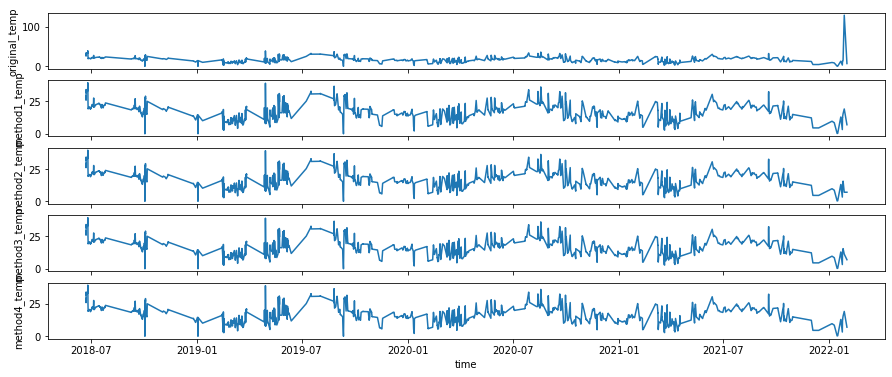

In [240]:
# Time series
fig, axs = plt.subplots(temperature.shape[1]-1, 1, figsize=(15,6), sharex=True)
for i, col in enumerate(temperature.drop('time',axis=1)):
        sns.lineplot(data=temperature, x='time', y=col, ax=axs[i])

In [241]:
new_data = pd.concat([pression,temperature],axis=1)
new_data.corr()

,original,method1,method2,method3,method4,original_temp,method1_temp,method2_temp,method3_temp,method4_temp
original,1.000000,0.073149,-0.041928,0.036364,0.073149,0.133911,0.173672,0.177514,0.176182,0.173672
method1,0.073149,1.000000,0.993120,0.997874,1.000000,-0.293153,-0.302511,-0.302392,-0.302461,-0.302511
method2,-0.041928,0.993120,1.000000,0.995253,0.993120,-0.309738,-0.323057,-0.323307,-0.323248,-0.323057
method3,0.036364,0.997874,0.995253,1.000000,0.997874,-0.293185,-0.308561,-0.309103,-0.308941,-0.308561
method4,0.073149,1.000000,0.993120,0.997874,1.000000,-0.293153,-0.302511,-0.302392,-0.302461,-0.302511
original_temp,0.133911,-0.293153,-0.309738,-0.293185,-0.293153,1.000000,0.969063,0.961754,0.964404,0.969063
method1_temp,0.173672,-0.302511,-0.323057,-0.308561,-0.302511,0.969063,1.000000,0.999606,0.999834,1.000000
method2_temp,0.177514,-0.302392,-0.323307,-0.309103,-0.302392,0.961754,0.999606,1.000000,0.999952,0.999606
method3_temp,0.176182,-0.302461,-0.323248,-0.308941,-0.302461,0.964404,0.999834,0.999952,1.000000,0.999834
method4_temp,0.173672,-0.302511,-0.323057,-0.308561,-0.302511,0.969063,1.000000,0.999606,0.999834,1.000000


<AxesSubplot:>

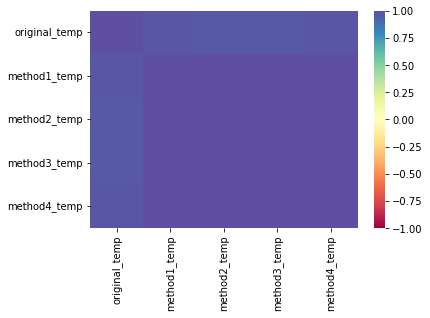

In [242]:
# Correlation matrix
temperature["id"]=data["id"]
corr = temperature.drop(columns=['id']).corr()
sns.heatmap(corr, cmap='Spectral', center=0, vmax=1., vmin=-1.)

For the temperature the method 1 is slighty better than the others

# Humidity


In [243]:
from scipy.stats.mstats import winsorize

In [244]:
humidity = pd.DataFrame({
    'time': data.time,
    'original_hum1': data.hum1,
    'original_hum2': data.hum2,
    'method1_hum1': np.random.randn(data.Pression.shape[0]),
    'method1_hum2': np.random.randn(data.Pression.shape[0]),
    'method2_hum2': np.random.randn(data.Pression.shape[0]),
    'method3_hum2': np.random.randn(data.Pression.shape[0]),
    'method4_hum2': np.random.randn(data.Pression.shape[0])
    })
humidity.head(30)

,time,original_hum1,original_hum2,method1_hum1,method1_hum2,method2_hum2,method3_hum2,method4_hum2
0,2018-06-22 12:00:52,41.45,50.52,1.112994,-0.248831,0.603420,-0.280223,1.309632
1,2018-06-22 12:05:59,44.21,53.92,0.543360,-0.523242,0.265444,-1.399017,0.862012
2,2018-06-22 12:11:05,46.44,54.95,-0.310259,-0.696694,-0.773118,0.241607,0.424738
3,2018-06-22 12:16:12,50.00,57.26,-0.201457,-1.112149,-0.671404,0.576415,-1.273181
4,2018-06-22 12:21:19,49.12,56.83,-0.158596,-0.814521,1.490426,-1.265930,0.333555
5,2018-06-22 12:26:25,49.07,56.48,0.082204,1.472829,0.890713,1.520154,1.478496
6,2018-06-22 12:31:32,49.42,56.92,-1.069090,-1.332301,0.167666,-0.125940,-0.294707
7,2018-06-22 12:36:39,49.94,57.42,1.118594,-0.562167,1.295509,-0.142783,0.443404
8,2018-06-22 12:41:46,49.70,57.09,0.316508,-0.579987,0.285398,0.312727,-1.748410
9,2018-06-22 12:46:52,49.75,57.25,2.722116,2.347711,-0.038899,-0.449282,-1.257816


We can see from the lineplots below that the data from the humidity 2 is very weird and composed mostly by outliers. According to the archives, humidity in Montpellier should be between 30% and 95% for extreme case. Thus, we will only focus on Humidity 1.

Text(0.5, 1.0, 'Humidity 2')

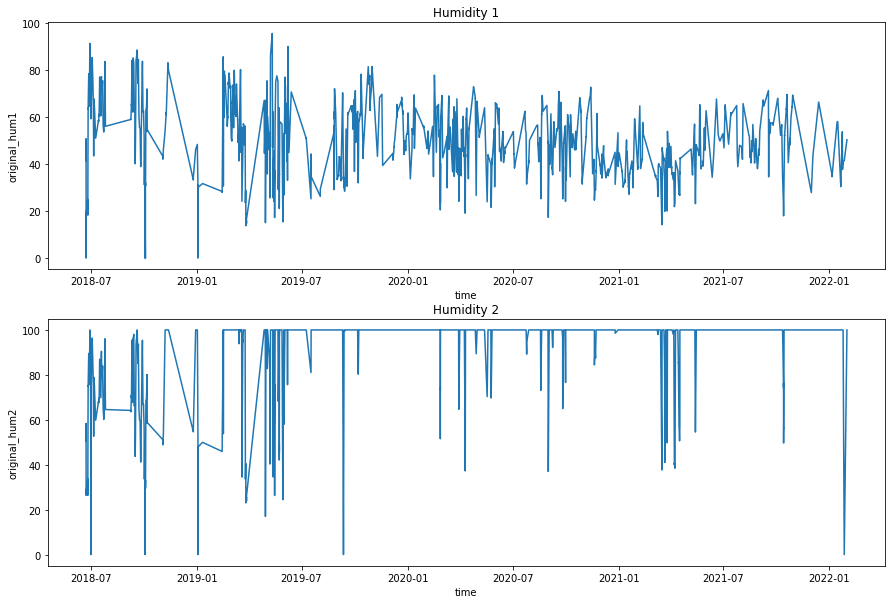

In [245]:
# Time series
fig, axs = plt.subplots(2,1,figsize=(15,10))
sns.lineplot(data=humidity, x='time', y='original_hum1', ax=axs[0])
axs[0].set_title('Humidity 1')
sns.lineplot(data=humidity, x='time', y='original_hum2', ax=axs[1])
axs[1].set_title('Humidity 2')


In [246]:
humidity.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99])

,original_hum1,original_hum2,method1_hum1,method1_hum2,method2_hum2,method3_hum2,method4_hum2
count,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000
mean,45.055066,84.246815,0.005978,0.008755,0.026831,-0.001965,0.028370
std,19.420880,26.049077,0.978091,1.005859,0.992444,1.003004,0.991921
min,0.000000,0.000000,-3.210832,-3.184253,-3.508811,-3.776223,-3.538796
1%,14.813500,18.580000,-2.177248,-2.317508,-2.348213,-2.276755,-2.185146
10%,21.930000,33.710000,-1.256460,-1.275974,-1.242283,-1.331745,-1.245163
20%,27.700000,60.290000,-0.820488,-0.837667,-0.829943,-0.843546,-0.830549
30%,33.410000,85.795000,-0.509108,-0.532564,-0.495387,-0.503504,-0.498714
40%,36.950000,100.000000,-0.236545,-0.252908,-0.229313,-0.252859,-0.226406
50%,41.950000,100.000000,-0.007835,0.011042,0.023763,-0.007742,0.006334


In [247]:

def remove_outliers_humidty(df):
    list_humidity = list(df)
    for index in range(1,1,len(list_humidity)):
        if( abs(list_humidity[index]-list_humidity[index-1])>70):
            list_humidity[index]= np.nan

    return np.array(list_humidity)

In [248]:
def remove_outliers_hum2(df,col_name):
    for name in col_name:
        df[name] = df["original_hum2"]
        df[name] = df[name].clip(lower=5,upper=95) #Range from what we found
        df[name]=remove_outliers_humidty(df[name])
        df[name].replace(5,np.nan,inplace=True)
        df[name].replace(95,np.nan,inplace=True)      

def remove_outliers_hum1(df,col_name):
    for name in col_name:
        df[name] = df["original_hum1"]
        df[name] = df[name].clip(lower=5,upper=95) #Range from what we found
        df[name]=remove_outliers_humidty(df[name])
        df[name].replace(5,np.nan,inplace=True)
        df[name].replace(95,np.nan,inplace=True)
method_list_humidity2= ["method1_hum2","method2_hum2","method3_hum2","method4_hum2"]
method_list_humidity1= ["method1_hum1"]

remove_outliers_hum2(humidity,method_list_humidity2)
remove_outliers_hum1(humidity,method_list_humidity1)

Check the pourcentage of Nan thatn we have in order to find the best approximation

In our case we have less than 1%, so we can use the method as previous 

In [249]:
print(humidity.isnull().sum()/humidity.size)

time             0.000000
original_hum1    0.000000
original_hum2    0.000000
method1_hum1     0.004035
method1_hum2     0.084939
method2_hum2     0.084939
method3_hum2     0.084939
method4_hum2     0.084939
dtype: float64


# Humidity 1
In this case we will just drop the na value, in fact we have less than 0.3% of na value. So we can drop them without impacting our study

In [250]:
humidity.method1_hum1.dropna()

0       41.45
1       44.21
2       46.44
3       50.00
4       49.12
        ...  
3031    37.65
3032    37.66
3033    40.75
3034    41.45
3035    50.28
Name: method1_hum1, Length: 2938, dtype: float64

# Humidity 2 

As we can see from the previous plot , there are more outliers for humidity 2, we will use 

In [251]:
sample_method1_mean_humidty2 = humidity["method1_hum2"].mean()
humidity["method1_hum2"]= humidity["method1_hum2"].fillna(value=sample_method1_mean_humidty2)

In [252]:
humidity["method2_hum2"]= humidity["method2_hum2"].fillna(method="backfill")

In [253]:
humidity["method3_hum2"]= humidity["method3_hum2"].interpolate(method="linear",axis=0,limit=None)

In [254]:
humidity.method4_hum2.dropna()

0       50.52
1       53.92
2       54.95
3       57.26
4       56.83
        ...  
2986    60.36
2987    61.47
2988    61.96
2989    61.99
2990    62.02
Name: method4_hum2, Length: 973, dtype: float64

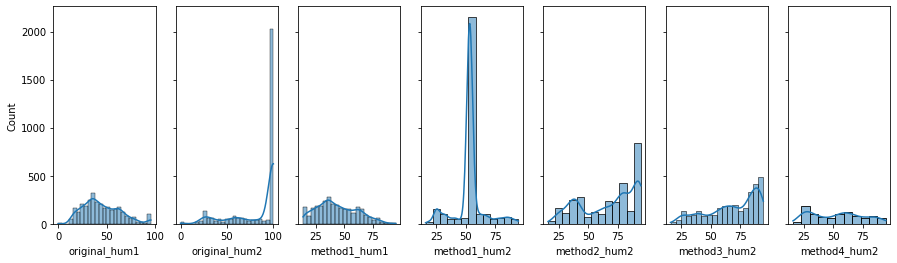

In [255]:
# Histograms
fig, axs = plt.subplots(1, humidity.shape[1]-1, figsize=(15,4), sharey=True)
for i, col in enumerate(humidity.drop('time',axis=1)):
        sns.histplot(humidity, x=col, ax=axs[i], kde=True)

For humidity 1 : The drop na is a good idea, we have a good result with this method 

For humidity 2 : In this case we don't have good result with Knn mehtod so we have decided to subtitue this method with a drop na. Let's see the result  

<AxesSubplot:>

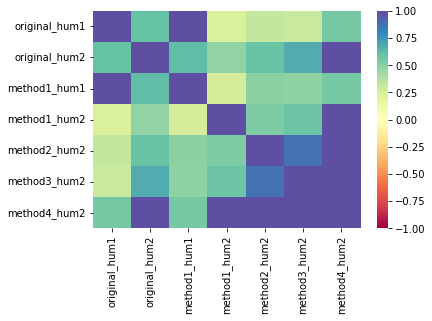

In [256]:
# Correlation matrix
humidity["id"]=data["id"]
corr = humidity.drop(columns=['id']).corr()
sns.heatmap(corr, cmap='Spectral', center=0, vmax=1., vmin=-1.)

For humidity 1 : The method of the drop na is a good one , in this case we thaugth that it was not usefull to do other methods 

For humidity 2 : the best method is the drop na , the dataset that we get is very close from the original one.